In [1]:
import pandas as pd
from iertools.read import read_sql
from dateutil.parser import parse
import matplotlib.pyplot as plt
# Linkage 1 to 2, thermal zone to outdoor

In [2]:
f = "../idf/evap_one_zone/one_zone.sql"
tmp = read_sql(f)
nombres = {
    'Environment:Site Outdoor Air Drybulb Temperature (C)': 'To',
    'Environment:Site Outdoor Air Relative Humidity (%)': 'hr',
    'Environment:Site Wind Speed (m/s)': 'ws',
    'Environment:Site Wind Direction (deg)': 'wd',
    'CAFE:Zone Mean Air Temperature (C)': 'Ti',
    'CAFE:Zone Air Relative Humidity (%)':'hr_cafe',
    'VESTE:AFN Linkage Node 1 to Node 2 Volume Flow Rate (m3/s)': 'Veste_out',
    'VESTE:AFN Linkage Node 2 to Node 1 Volume Flow Rate (m3/s)': 'Veste_in',
    'VOESTE:AFN Linkage Node 1 to Node 2 Volume Flow Rate (m3/s)': 'Voeste_out',
    'VOESTE:AFN Linkage Node 2 to Node 1 Volume Flow Rate (m3/s)': 'Voeste_in',
    'VESTE:AFN Linkage Node 1 to Node 2 Mass Flow Rate (kg/s)': 'Meste_out',
    'VESTE:AFN Linkage Node 2 to Node 1 Mass Flow Rate (kg/s)': 'Meste_in',
    'VOESTE:AFN Linkage Node 1 to Node 2 Mass Flow Rate (kg/s)':'MOeste_out',
    'VOESTE:AFN Linkage Node 2 to Node 1 Mass Flow Rate (kg/s)':'MOeste_in' 
}

tmp.rename(columns=nombres)
data = tmp.data
data

variable_name,hr_cafe,Ti,Environment:Site Outdoor Air Barometric Pressure (Pa),To,hr,Environment:Site Outdoor Air Wetbulb Temperature (C),wd,ws,Veste_out,Veste_in,Voeste_out,Voeste_in
date,,,,,,,,,,,,
2006-01-01 00:01:00,52.638773,10.0,87214.0,23.0,23.0,11.055258,270.0,0.0,2.561175,2.561175,2.561175,2.561175
2006-01-01 00:02:00,52.638774,10.0,87214.0,23.0,23.0,11.055258,270.0,0.0,2.561175,2.561175,2.561175,2.561175
2006-01-01 00:03:00,52.638774,10.0,87214.0,23.0,23.0,11.055258,270.0,0.0,2.561175,2.561175,2.561175,2.561175
2006-01-01 00:04:00,52.638774,10.0,87214.0,23.0,23.0,11.055258,270.0,0.0,2.561175,2.561175,2.561175,2.561175
2006-01-01 00:05:00,52.638774,10.0,87214.0,23.0,23.0,11.055258,270.0,0.0,2.561175,2.561175,2.561175,2.561175
...,...,...,...,...,...,...,...,...,...,...,...,...
2006-01-31 23:56:00,95.142245,10.0,87214.0,40.0,40.0,27.413613,270.0,0.0,4.376220,4.376220,4.376220,4.376220
2006-01-31 23:57:00,95.142349,10.0,87214.0,40.0,40.0,27.413613,270.0,0.0,4.376219,4.376220,4.376219,4.376220
2006-01-31 23:58:00,95.142453,10.0,87214.0,40.0,40.0,27.413613,270.0,0.0,4.376219,4.376219,4.376219,4.376219


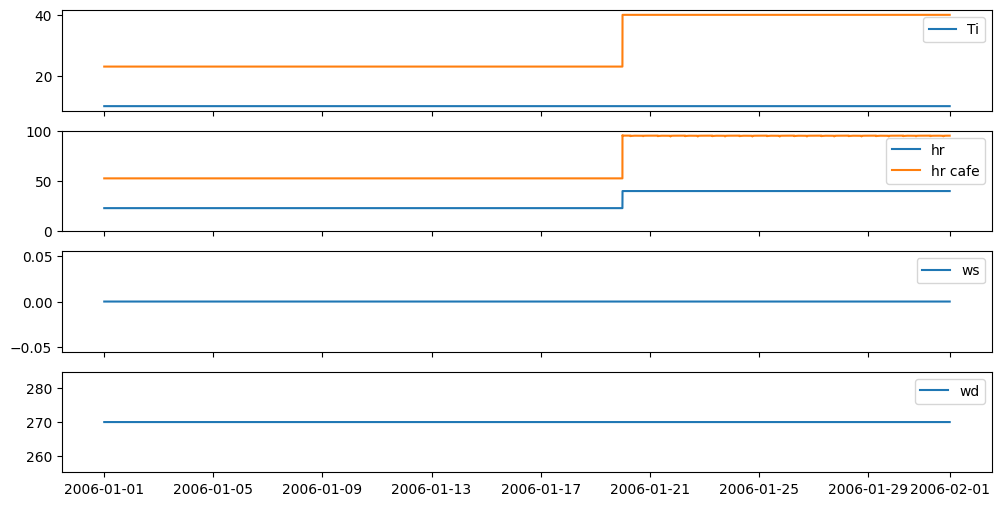

In [3]:
fig, ax = plt.subplots(4,figsize=(12,6),sharex=True)

ax[0].plot(data.Ti,label="Ti")
ax[0].plot(data.To)

ax[1].plot(data.hr,label="hr")
ax[1].plot(data.hr_cafe,label="hr cafe")
ax[1].set_ylim(0,100)

ax[2].plot(data.ws,label="ws")
ax[3].plot(data.wd,label="wd")

for a in ax:
    a.legend()

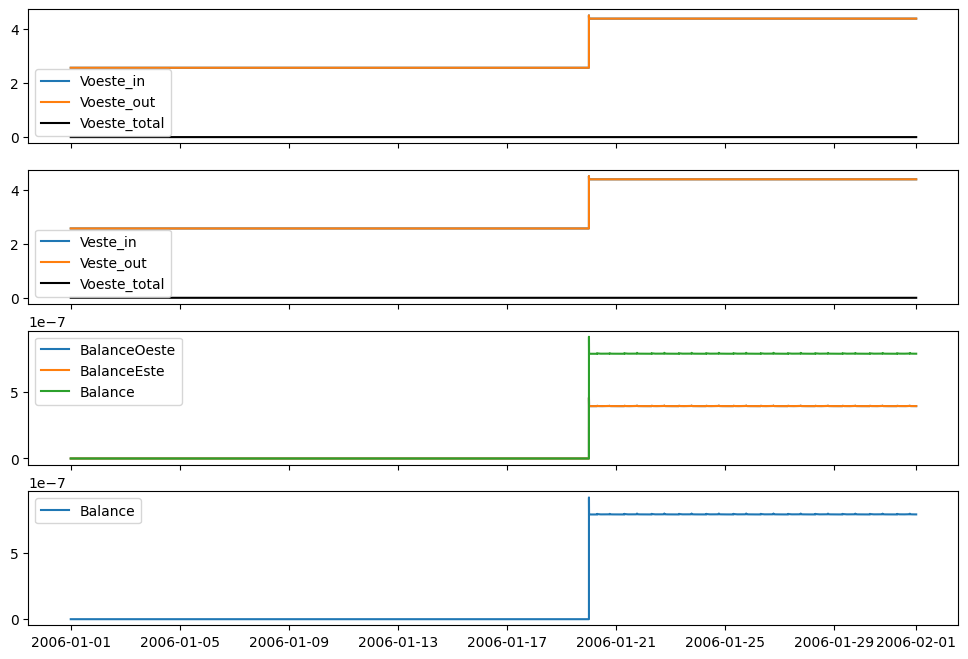

In [4]:
# # f1 = parse("2006-01-17")
# # f2 = f1 + pd.Timedelta("5D")
fig, ax = plt.subplots(4,figsize=(12,8),sharex=True)


ax[0].plot(data.Voeste_in,label="Voeste_in")
ax[0].plot(data.Voeste_out,label="Voeste_out")
ax[0].plot(data.Voeste_in - data.Voeste_out,"k-",label="Voeste_total")

ax[1].plot(data.Veste_in,label="Veste_in")
ax[1].plot(data.Veste_out,label="Veste_out")
ax[1].plot(data.Voeste_in - data.Voeste_out,"k-",label="Voeste_total")

balanceOeste = data.Voeste_in - data.Voeste_out
balanceEste  = data.Veste_in  - data.Veste_out

ax[2].plot(balanceOeste,label='BalanceOeste')
ax[2].plot(balanceEste,label='BalanceEste')
ax[2].plot(balanceOeste + balanceEste,label="Balance")

ax[3].plot(balanceOeste + balanceEste,label="Balance")



for a in ax:
    a.legend()
#     a.set_xlim(f1,f2)
